# Midterm Exam
## Each task of the exam is performed on the original images, unless the reverse is said
## At the end of the exam, you need to commit Jupiter's notebook into GitHab in the machine vision repository in a separate folder called Midterm. Each task must be commited in separate corresponding file, e.g. Task1.ipynb.

### Task 1
Apply each filter to image, specify which properties corresponds to filters

(1) corresponds to a low-pass filter in the frequency domain; (2) less than the other specified noise-canceling filters, blurs edges; (3) increases the sharpness of the image (4) works slower than the other specified noise-canceling filters; (5) is not a noise canceling filter; (6) poorly removes noise such as "salt and pepper"; (7) will destroy all lines of one pixel thickness in the image
1 а б в г д
2 д
3 г
4 в
5 д
6 в
7

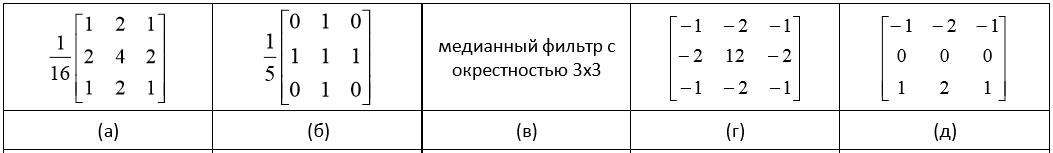

### Task 2
Construct a histogram of the brightness of the image. Apply the operation "linear stretching of brightness" and "the gray world" to the image. Operation "the gray world" needs to be realized independently. The mean can be called three times.

### Task 3
Shake the image with a noise like "salt and pepper". Suppress noise with a median filter. Map the difference between the original and noisy images, and between the adjusted and the original.

### Task 4

Apply the Canny and Sobel edge selection filters to the image. Try different options. Output the result of the selection of edges on the original color image in red.

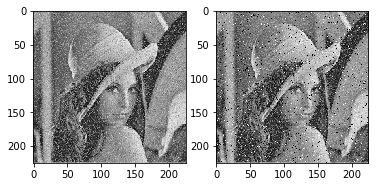

In [23]:
import numpy as np
import random
import scipy.misc as simg
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy import ndimage as ndimg
from PIL import Image
import math
from skimage import data
from skimage import feature

def add_noise(img):
    output = np.zeros(img.shape, np.uint8)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            rand = random.random()
            if rand < 0.02:
                output[i][j] = 0
            elif rand > 0.99:
                output[i][j] = 255
            else:
                output[i][j] = img[i][j]
    return output
image = simg.imread('./lena.jpg', mode = 'F')
image2 = add_noise(image)

plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.subplot(122)
plt.imshow(image2, cmap='gray')
plt.show()

(225, 225)


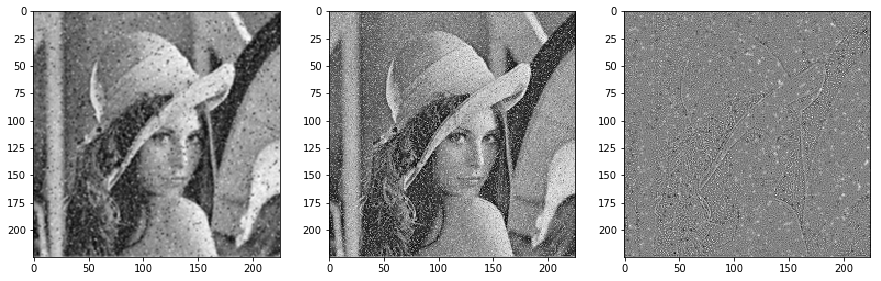

In [26]:
from scipy import ndimage
import numpy as np
k = np.array([[1/16,2/16,1/16],[2/16,4/16,2/16],[1/16,2/16,1/16]])
print(image.shape)
flt = ndimage.convolve(image2, k, mode='nearest', cval=0.0)
fig = plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(flt,cmap='gray')
plt.subplot(132)
plt.imshow(image2,cmap='gray')
plt.subplot(133)
plt.imshow((image2-flt),cmap='gray')


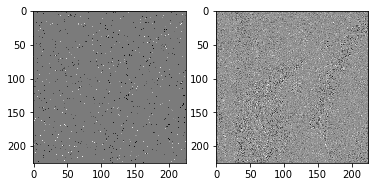

In [47]:
from scipy import ndimage as nimg
import numpy as np
med = nimg.median_filter(image2, 3)
plt.subplot(121)
plt.imshow(image2-image, cmap = 'gray')
plt.subplot(122)
plt.imshow(med-image, cmap = 'gray')
plt.show()

(225, 225)


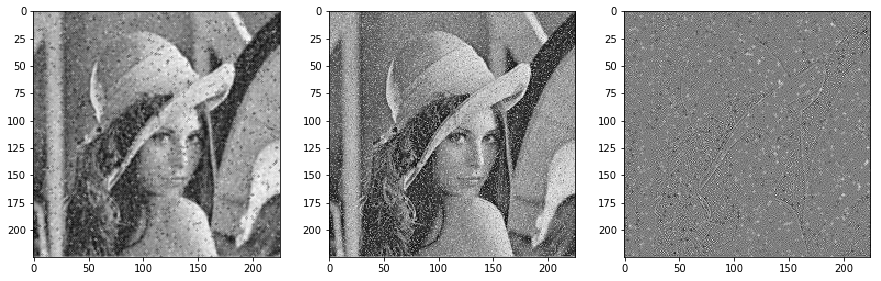

In [28]:
from scipy import ndimage
import numpy as np
k = np.array([[0,1/5,0],[1/5,1/5,1/5],[0,1/5,0]])
print(image.shape)
flt = ndimage.convolve(image2, k, mode='nearest', cval=0.0)
fig = plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(flt,cmap='gray')
plt.subplot(132)
plt.imshow(image2,cmap='gray')
plt.subplot(133)
plt.imshow((image2-flt),cmap='gray')


(225, 225)


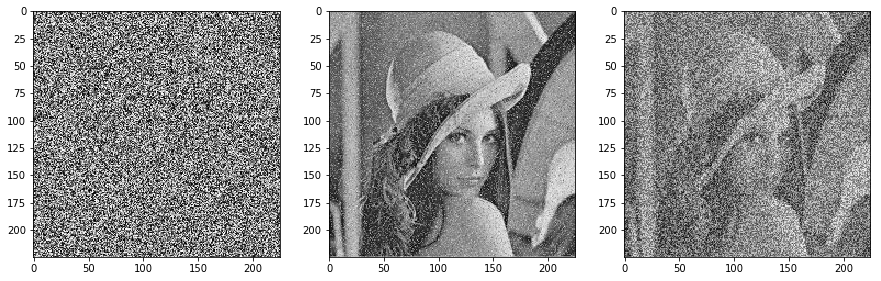

In [29]:
from scipy import ndimage
import numpy as np
k = np.array([[-1,-2,-1],[-2,12,-2],[-1,-2,-1]])
print(image.shape)
flt = ndimage.convolve(image2, k, mode='nearest', cval=0.0)
fig = plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(flt,cmap='gray')
plt.subplot(132)
plt.imshow(image2,cmap='gray')
plt.subplot(133)
plt.imshow((image2-flt),cmap='gray')

(225, 225)


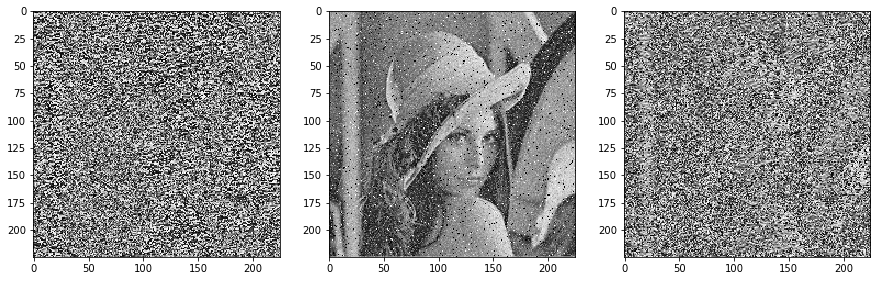

In [30]:
from scipy import ndimage
import numpy as np
k = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
print(image.shape)
flt = ndimage.convolve(image2, k, mode='nearest', cval=0.0)
fig = plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(flt,cmap='gray')
plt.subplot(132)
plt.imshow(image2,cmap='gray')
plt.subplot(133)
plt.imshow((image2-flt),cmap='gray')


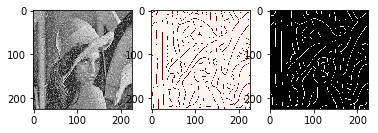

In [69]:
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import feature
imlen = ndi.gaussian_filter(image2, 4)
edglen = feature.canny(imlen)
edglen2 = feature.canny(imlen, 3)
plt.subplot(131)
plt.imshow(image2,cmap='gray')
plt.subplot(132)
plt.imshow(edglen,cmap='Reds')
plt.subplot(133)
plt.imshow(edglen2,cmap='gray')

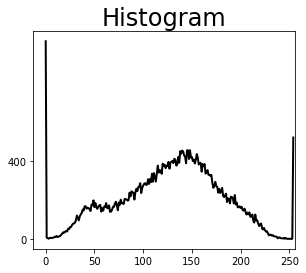

In [44]:
import numpy as np
from skimage import data
img = data.camera()
values, bins = np.histogram(image2, bins=np.arange(256))
fig, ax1 = plt.subplots(figsize=(8, 4))
ax1.plot(bins[:-1], values, lw=2, c='k')
ax1.set_xlim(xmax=256)
ax1.set_yticks([0, 400])
ax1.set_aspect(.2)
ax1.set_title('Histogram', fontsize=24)

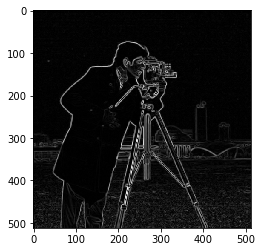

In [66]:
from skimage.filters import sobel
edge_sobel = sobel(data.camera())
plt.imshow(edge_sobel, cmap = 'gray')

TypeError: Image data can not convert to float

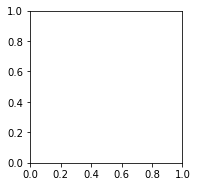

In [75]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('lini.jpg', 0)
color = ('b','g','r')

plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.show()
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[596],[0,596])
    plt.plot(histr,color = col)
    plt.xlim([0,596])
plt.show()

hist,bins = np.histogram(img.flatten(),596,[0,596])

plt.hist(img.flatten(),596,[0,596], color = 'r')
plt.xlim([0,596])
plt.legend(('histogram'), loc = 'upper left')
plt.show()

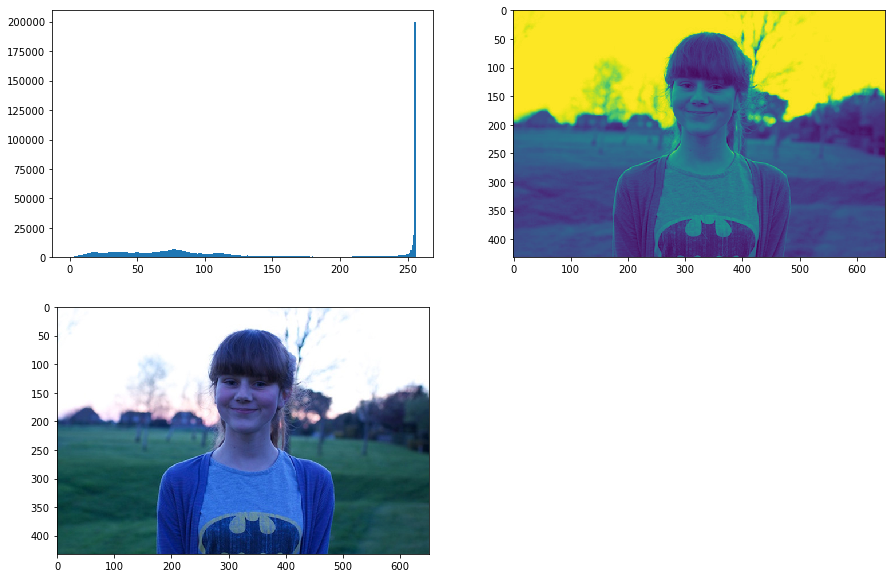

In [74]:
import matplotlib.pyplot as plt
#import matplotlib.image as img
import numpy as np
import scipy.misc as img
from skimage import feature

from scipy import ndimage
import random
%matplotlib inline


image = img.imread('./white.jpg')
imag = img.imread('./white.jpg', mode = 'F')
im = image


fig = plt.figure(figsize=(15,10))

plt.subplot(223)
plt.imshow(image)

plt.subplot(221)
plt.hist(im.ravel(), 256, [0,256])


sumr = 0
sumg = 0
sumb = 0
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        sumr += image[i,j,0]
        sumg += image[i,j,1]
        sumb += image[i,j,2]

sumr /= image.size
sumg /= image.size
sumb /= image.size

avg = sumr + sumg + sumb
avg /= 3


for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        image[i,j,0]*=avg/sumr
        image[i,j,1]*=avg/sumg
        image[i,j,2]*=avg/sumb
                

plt.subplot(222)
plt.imshow(imag)



plt.show()